Siraphop Mukdphetcharat 64011614

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from six import StringIO
from IPython.display import Image
import pydotplus

## EDA

In [2]:
# load data
df = pd.read_csv("bank.csv")
print(df)

          id  age     sex      region    income married  children  car  \
0    ID12101   48  FEMALE  INNER_CITY  17546.00      NO         1   NO   
1    ID12102   40    MALE        TOWN  30085.10     YES         3  YES   
2    ID12103   51  FEMALE  INNER_CITY  16575.40     YES         0  YES   
3    ID12104   23  FEMALE        TOWN  20375.40     YES         3   NO   
4    ID12105   57  FEMALE       RURAL  50576.30     YES         0   NO   
..       ...  ...     ...         ...       ...     ...       ...  ...   
595  ID12696   61  FEMALE  INNER_CITY  47025.00      NO         2  YES   
596  ID12697   30  FEMALE  INNER_CITY   9672.25     YES         0  YES   
597  ID12698   31  FEMALE        TOWN  15976.30     YES         0  YES   
598  ID12699   29    MALE  INNER_CITY  14711.80     YES         0   NO   
599  ID12700   38    MALE        TOWN  26671.60      NO         0  YES   

    save_act current_act mortgage  pep  
0         NO          NO       NO  YES  
1         NO         YES     

Data Info

In [3]:
print("data info")
print(df.info())

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB
None


Summary Statistics

              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000

 Histogram


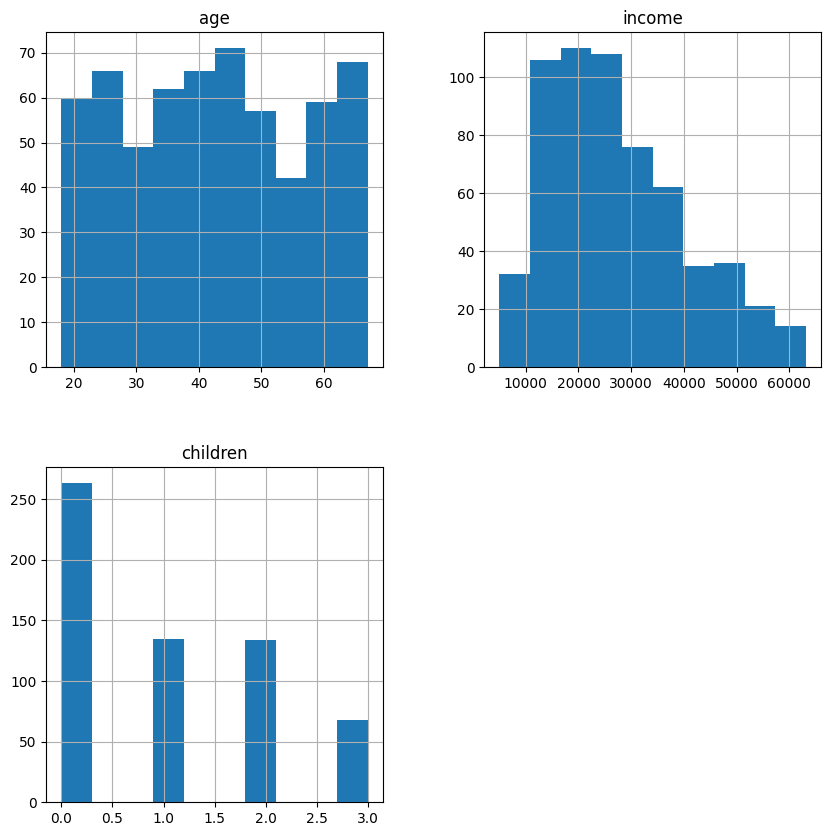

In [4]:
print(df.describe())

print("\n Histogram")
df.hist(figsize=(10,10))
plt.show()

Normalize data

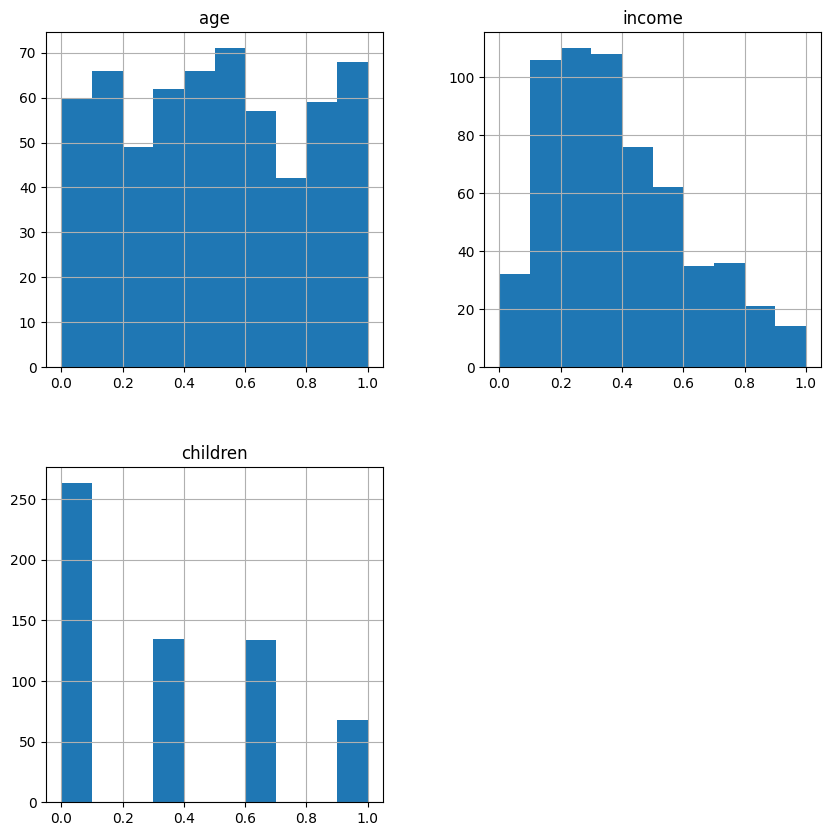

In [5]:
column_to_normalize = ['age', 'income', 'children']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[column_to_normalize] = scaler.fit_transform(df[column_to_normalize])
df_normalized.hist(figsize=(10, 10))
plt.show()

Relationship and Pattern

               age    income  children
age       1.000000  0.752726  0.023572
income    0.752726  1.000000  0.036761
children  0.023572  0.036761  1.000000


C:\Users\Tonkhaow\AppData\Local\Temp\ipykernel_8512\449654870.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

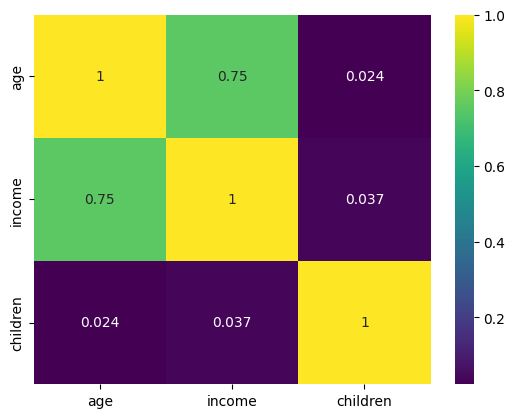

In [6]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

handle missing values

In [7]:
print(df.isnull().sum())

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64


print unique values

In [8]:
print(df.nunique())

id             600
age             50
sex              2
region           4
income         599
married          2
children         4
car              2
save_act         2
current_act      2
mortgage         2
pep              2
dtype: int64


convert boolean data into 1 and 0

In [9]:
df.replace({"NO" : 0, "YES" : 1}, inplace = True)
df.replace({"FEMALE" : 0, "MALE": 1}, inplace = True)
df.replace({"INNER_CITY": 0, "TOWN": 1, "RURAL": 2, "SUBURBAN": 3}, inplace = True)
print(df)

          id  age  sex  region    income  married  children  car  save_act  \
0    ID12101   48    0       0  17546.00        0         1    0         0   
1    ID12102   40    1       1  30085.10        1         3    1         0   
2    ID12103   51    0       0  16575.40        1         0    1         1   
3    ID12104   23    0       1  20375.40        1         3    0         0   
4    ID12105   57    0       2  50576.30        1         0    0         1   
..       ...  ...  ...     ...       ...      ...       ...  ...       ...   
595  ID12696   61    0       0  47025.00        0         2    1         1   
596  ID12697   30    0       0   9672.25        1         0    1         1   
597  ID12698   31    0       1  15976.30        1         0    1         1   
598  ID12699   29    1       0  14711.80        1         0    0         1   
599  ID12700   38    1       1  26671.60        0         0    1         0   

     current_act  mortgage  pep  
0              0         0   

## Classification Models

### Decision Tree

Decision Tree (entropy and gini)

In [10]:
#split data into features and target variables
features_cols = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features_cols] # Features
y = df.pep # Target Variables

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training, 30% test

# Create Decision tree classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8666666666666667


Visualize

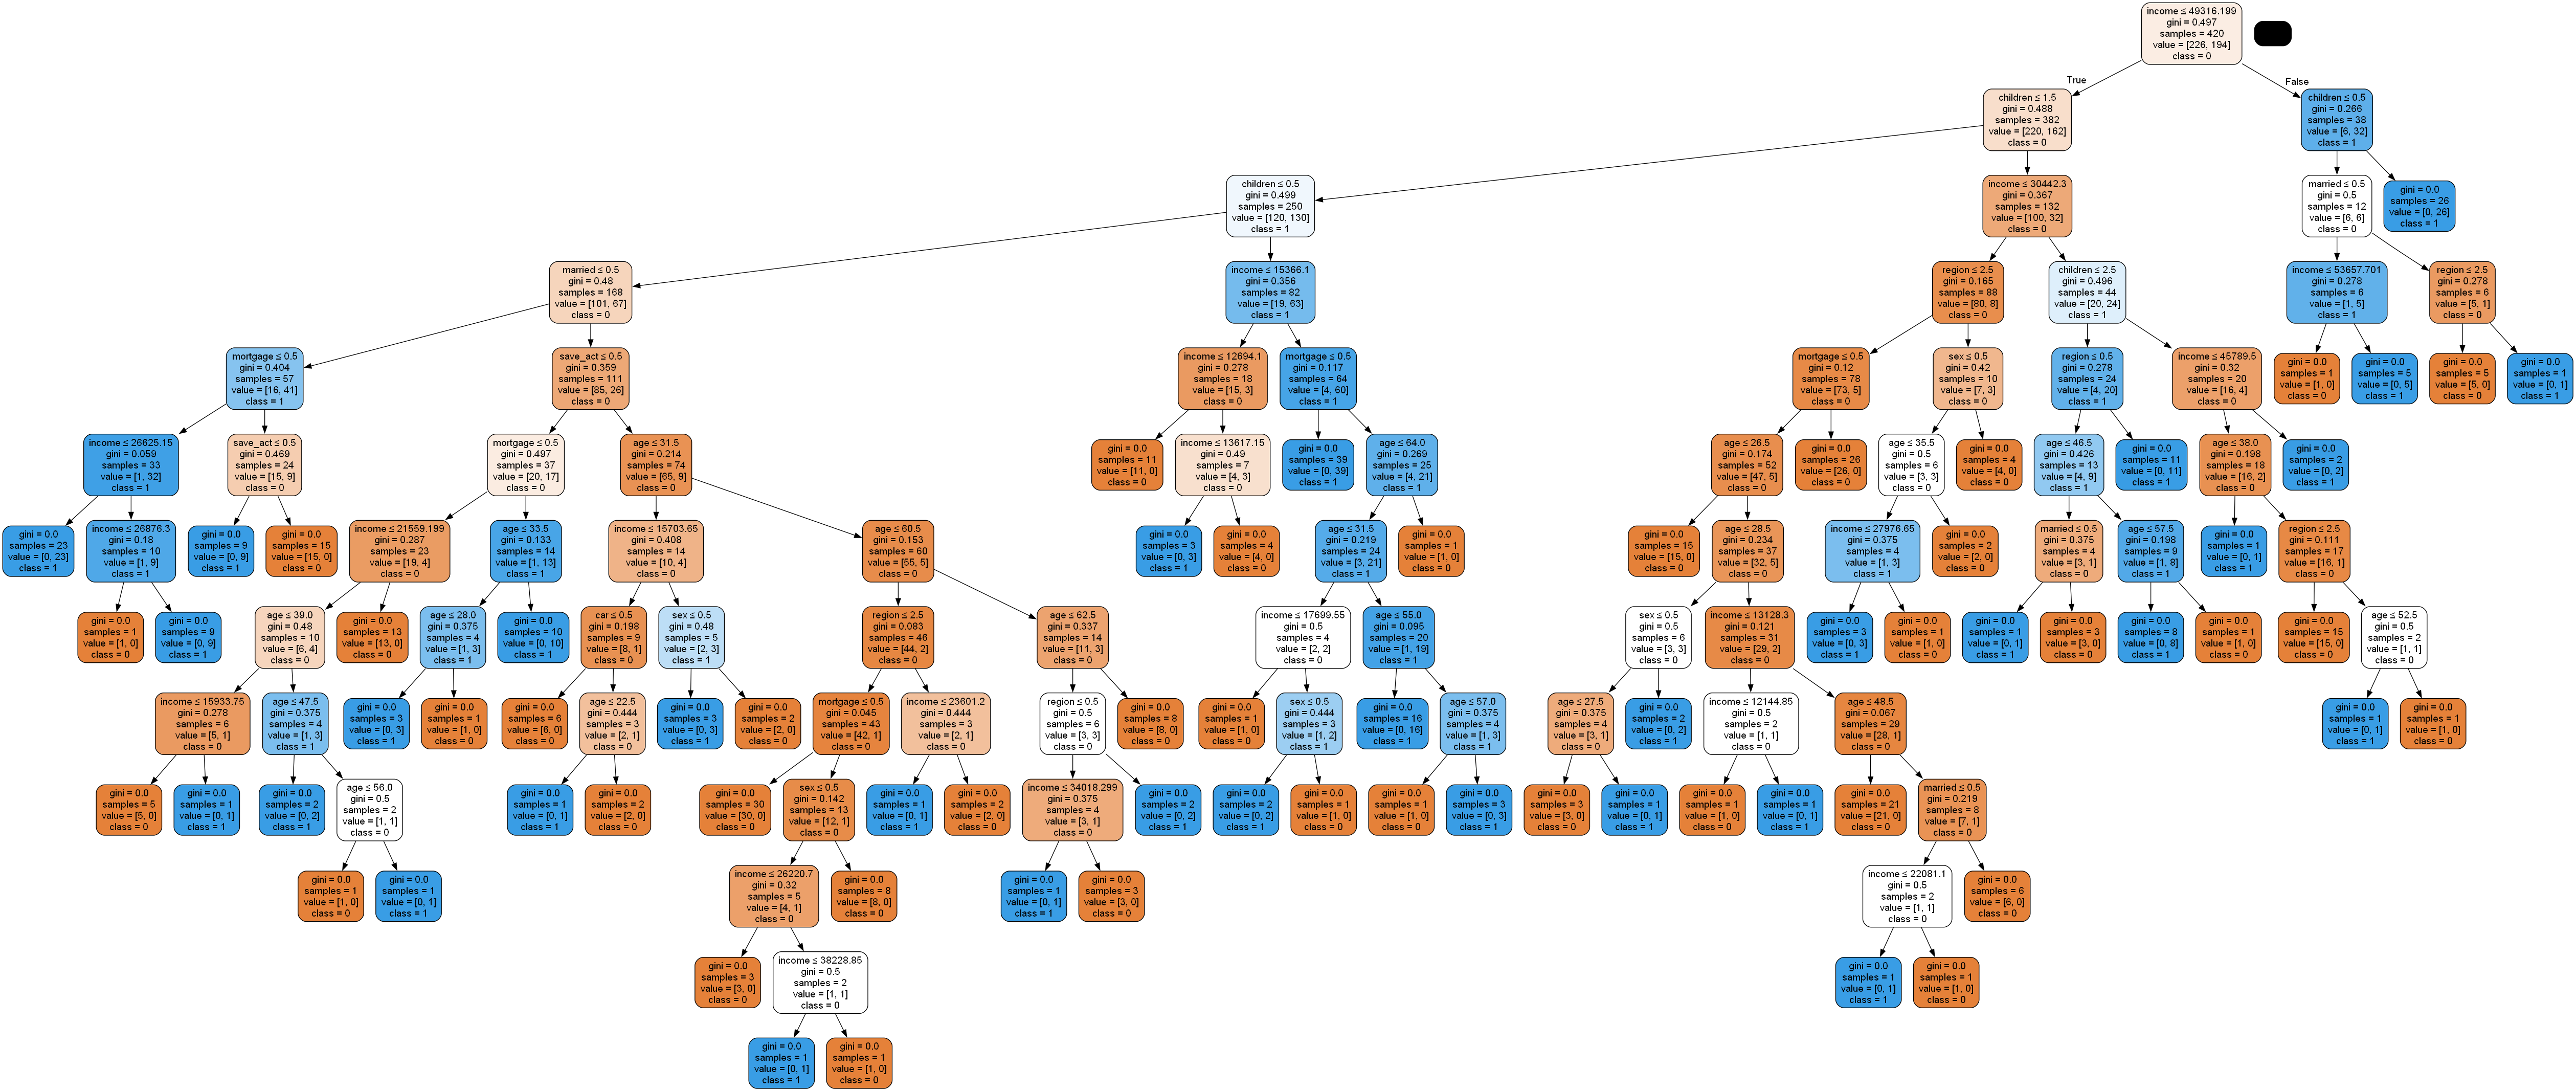

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names= features_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("bank.png")
Image(graph.create_png())

Since the above decision tree is not easy to understand, lets simplify it

In [12]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.8


Visualize

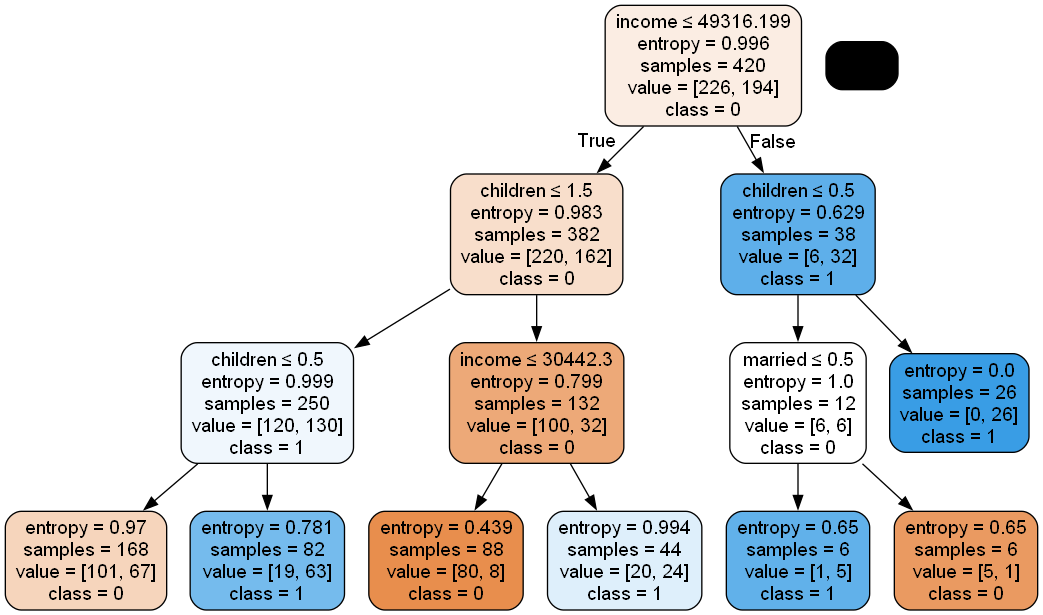

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names= features_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("bank_entropy.png")
Image(graph.create_png())

Gini Method: You measure how often you are wrong when classifing the dataset

Entropy Method: You measure how much data is needed to correctly classify the dataset

0 means same class, 1 means total mix

What I discovered:

The more layer, the more accurate the data will be

Both method offers the same accuracy, just different approach